# 경사 하강법(Gradient Descent)

In [32]:
import warnings
warnings.filterwarnings('ignore')

# Machine( ) 정의

* numpy Package

In [33]:
import numpy as np

## def Machine( )

In [34]:
def Machine(x, w, b):
    y_hat = (w * x) + b
    return y_hat

## x, w, b 객체 임의 지정

In [35]:
x = np.array([1, 3, 5, 7, 9])
w = 2
b = 1

## Machine( ) 테스트

In [36]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

# Gradient( ) 정의
* def Gradient( )

In [37]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)

    dw = np.mean((y - y_hat) * (-2 * x)) # 편미분
    db = np.mean((y - y_hat) * (-2)) # 편미분

    return dw, db

## Gradient( ) 테스트

In [39]:
y = np.array([2, 4, 6, 8, 10])

dw, db = Gradient(x, y, w, b)

In [40]:
print('dw is ', dw) # 기울기 변화량
print('db is ', db) # 절편 변화량

dw is  66.0
db is  10.0


# Learning( ) 정의
* def Learning( )

In [41]:
def Learning(x, y, w, b, step):
    dw, db = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db
    
    return uw, ub

## Learning( ) 테스트

In [42]:
step = 0.05

uw, ub = Learning(x, y, w, b, step)

In [43]:
print('Updated_w is ', '%.3f' % uw)
print('Updated_b is ', '%.3f' % ub)

Updated_w is  -1.300
Updated_b is  0.500


# testData.csv에 적용

* pandas & matplotlib Packages

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

## Read testData.csv

In [45]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

DATA = pd.read_csv(url)

## testData.csv Information

In [46]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.3 KB


In [47]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


## testData.csv Visualization
 - Distribution

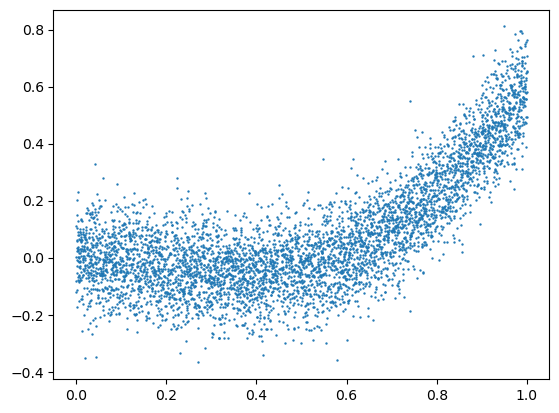

In [48]:
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

## 1500번 학습 실행

In [53]:
w = 2
b = 3
step = 0.05

In [54]:
for i in range(0, 5000):
    uw, ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
    w = uw
    b = ub

In [55]:
print('Learned_w is ', '%.3f' % w)
print('Learned_b is ', '%.3f' % b)

Learned_w is  0.505
Learned_b is  -0.170


## 학습결과 회귀선 그리기

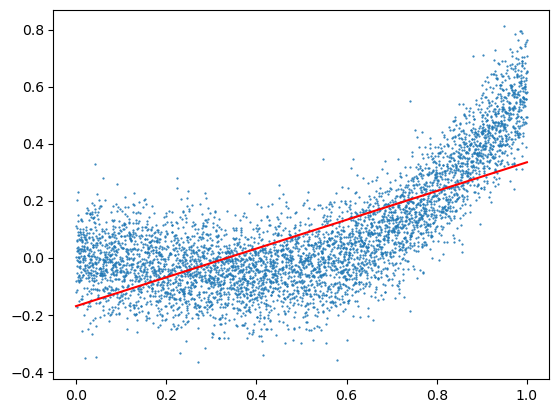

In [56]:
X = np.linspace(0, 1, 100)
Y = (w * X) + b

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

# Loss(MSE) Visualization

* Gradient( )에 MSE 추가

In [57]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)
    
    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))
    MSE = np.mean((y - y_hat)**2)

    return dw, db, MSE

## Learning( )에 MSE 추가

In [58]:
def Learning(x, y, w, b, step):
    dw, db, MSE = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db

    return uw, ub, MSE

## 1500번 학습 실행

In [59]:
w = 2
b = 3
step = 0.001
mse = []

In [60]:
for i in range(0, 1500):
    uw, ub, MSE = Learning(DATA.inputs, DATA.outputs, w, b, step)

    w = uw
    b = ub
    mse.append(MSE)

## Loss(MSE) 감소 확인

In [61]:
mse[0:10]

[15.595575679087718,
 15.51649361545252,
 15.43781315527885,
 15.359532259084672,
 15.281648897745166,
 15.204161052440112,
 15.127066714601563,
 15.050363885861781,
 14.974050578001444,
 14.8981248128981]

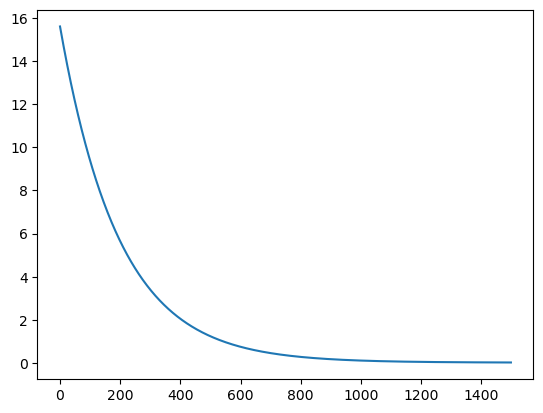

In [62]:
plt.plot(mse)
plt.show()

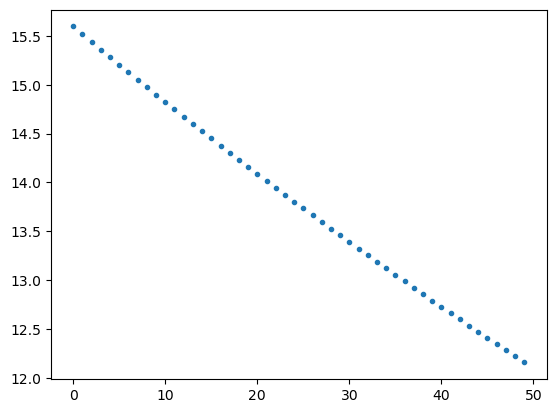

In [63]:
plt.plot(mse[0:50], '.')
plt.show()

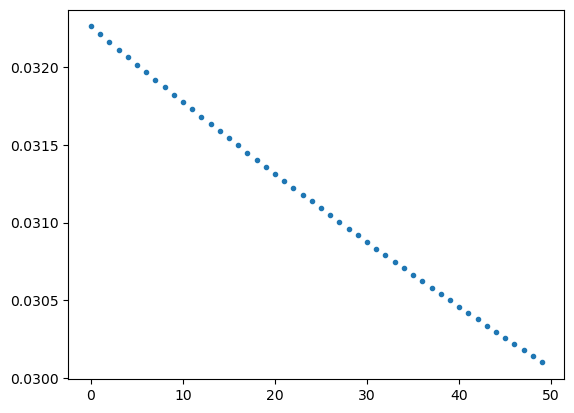

In [64]:
plt.plot(mse[1450:1500], '.')
plt.show()

# The End